In [96]:
import pandas as pd

df_ins = pd.read_csv('insurance.csv')

df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
df_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [98]:
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


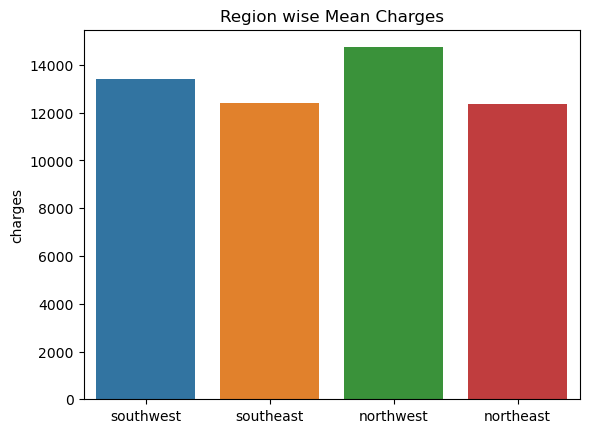

<Figure size 640x480 with 0 Axes>

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_regionwise_charges = df_ins.groupby('region')['charges'].mean()

sns.barplot(y=mean_regionwise_charges, x=df_ins.region.unique())
plt.title('Region wise Mean Charges')
plt.show()
plt.clf()


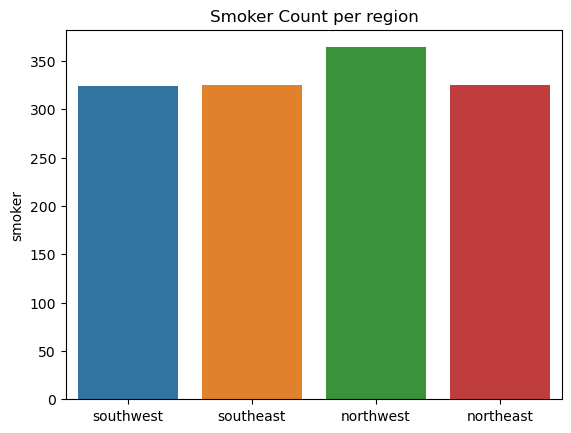

<Figure size 640x480 with 0 Axes>

In [101]:
smoker_count = df_ins.groupby('region')['smoker'].count()

sns.barplot(x=df_ins.region.unique(), y = smoker_count)
plt.title('Smoker Count per region')
plt.show()
plt.clf()

In [102]:
categorical_variables = ['sex', 'smoker', 'region']

sex_encode = []

for s in df_ins.sex:
    if s == 'female':
        sex_encode.append(1)
    else:
        sex_encode.append(2)

df_ins['encoded_sex'] = sex_encode

smoker_encode = []

for sm in df_ins.smoker:
    if sm == 'yes':
        smoker_encode.append(1)
    else:
        smoker_encode.append(0)

df_ins['encoded_smoker'] = smoker_encode

df_ins.region.unique()

region_encode = []

for r in df_ins.region:
    if r == 'southwest':
        region_encode.append(1)
    elif r=='southeast':
        region_encode.append(2)
    elif r == 'northwest':
        region_encode.append(3)
    else:
        region_encode.append(4)

df_ins['encoded_region'] = region_encode

df_encode = df_ins.drop(categorical_variables, axis=1)

df_encode.head()

,age,bmi,children,charges,encoded_sex,encoded_smoker,encoded_region
0,19,27.900,0,16884.92400,1,1,1
1,18,33.770,1,1725.55230,2,0,2
2,28,33.000,3,4449.46200,2,0,2
3,33,22.705,0,21984.47061,2,0,3
4,32,28.880,0,3866.85520,2,0,3


In [103]:
df_encode.drop(['encoded_region', 'encoded_sex'], axis=1).head()

,age,bmi,children,charges,encoded_smoker
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [104]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

y = df_encode.charges

X = df_encode.drop(['charges'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

my_model = RandomForestRegressor(n_estimators=100, random_state=0)

my_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [105]:
from sklearn.metrics import mean_absolute_error, accuracy_score

preds = my_model.predict(X_val)

#print(preds)

cv_scores = -1 * cross_val_score(my_model, X,y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross valiation scores with 5 folds: {cv_scores.mean()}")

mae = mean_absolute_error(y_val, preds)

print(f"MAE is: {mae}")

Cross valiation scores with 5 folds: 2670.524662452741
MAE is: 2706.256388773848


In [106]:
from xgboost import XGBRegressor

x_model = XGBRegressor(n_estimators = 400, random_state = 0, learning_rate = 0.01)

x_model.fit(X_train, y_train)

x_predict = x_model.predict(X_val)

x_mae = mean_absolute_error(x_predict, y_val)

print(f"MAE tuned model: {x_mae}")

MAE tuned model: 2582.77924935611
